# Problem Statement-:

To predict a CTR that "Click through rate" on email campaign. Most organizations today rely on email campaigns for effective communication with users. While ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).

CTR can be calculated as 
CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered.

Our problem statement is to build a smart system to predict the CTR for email campaigns and therefore identify the critical factors that will help the marketing team to maximize the CTR.

# Performance metric-:

The evaluation metric for this problem statement would be r2_score.

In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
#from sklearn.cross_validation import cross_val_score

from scipy import stats
import seaborn as sns
from copy import deepcopy

%matplotlib inline

In [3]:
#load train data
ctr_train = pd.read_csv('train_F3fUq2S.csv')
ctr_test = pd.read_csv('test_Bk2wfZ3.csv')

In [4]:
# overvier of data 
ctr_train.head(2)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000


In [5]:
#identifying number of rows and columns
shape= ctr_train.shape
print("Total number of datapoint-:",shape[0])
print("Total number of features-:",shape[1])

Total number of datapoint-: 1888
Total number of features-: 22


In [6]:
print('Features:',list(ctr_train.columns))

Features: ['campaign_id', 'sender', 'subject_len', 'body_len', 'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day', 'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote', 'is_timer', 'is_emoticons', 'is_discount', 'is_price', 'is_urgency', 'target_audience', 'click_rate']


### Statistics of Dataset :

In [7]:
# statistics of train data set
ctr_train.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,...,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,...,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,...,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,...,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,...,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


In [8]:
# statistics of test data set
ctr_test.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.0,762.000000,762.000000,762.000000,762.000000,762.000000
mean,2269.500000,4.249344,86.509186,14184.263780,33.185039,2.850394,0.209974,9.590551,17.872703,4.212598,30.154856,0.942257,0.043307,0.864829,0.0,0.286089,0.031496,20.994751,0.114173,11.648294
std,220.114743,3.131927,30.586394,7179.056026,26.889537,1.791697,0.407557,5.314579,11.786908,3.911229,10.952515,0.877114,0.203681,1.028553,0.0,0.973791,0.174769,315.295844,0.318230,3.034567
min,1889.000000,1.000000,11.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2079.250000,3.000000,68.000000,9697.250000,20.000000,1.000000,0.000000,6.000000,9.000000,2.000000,24.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000
50%,2269.500000,3.000000,83.000000,12740.500000,27.500000,3.000000,0.000000,10.000000,13.000000,3.000000,29.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000
75%,2459.750000,3.000000,98.000000,16746.000000,39.000000,4.000000,0.000000,15.000000,26.000000,5.000000,35.000000,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000
max,2650.000000,15.000000,265.000000,44491.000000,498.000000,6.000000,1.000000,15.000000,44.000000,42.000000,96.000000,6.000000,1.000000,5.000000,0.0,17.000000,1.000000,5000.000000,1.000000,16.000000


### Observations:
- Train and test data have quite same numeric distribution of mean, max and min value.

- Both the train and test variable data have a substantial standard deviation.
- Thus we can assume both train and test dataset have same distribution.

### Testing on missing values-:
We should always dedicate a part of our research on dealing with missing values

In [9]:
# is there any missing value in dataset
pd.isnull(ctr_train).values.any()

False

There are no null values in data set and we can proceed with current dataset.

### Target Feature-:

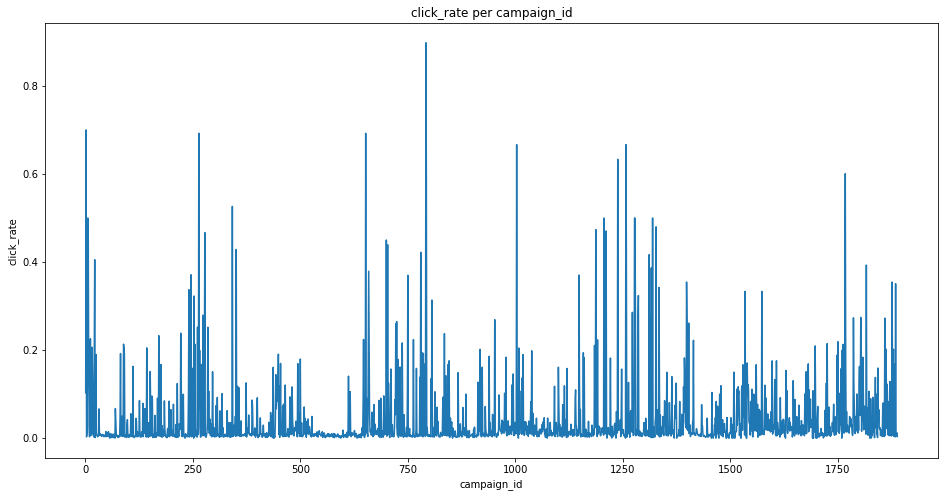

In [10]:
# lets plot CTR against campaign id
plt.figure(figsize=(16,8))
plt.plot(ctr_train['campaign_id'], ctr_train['click_rate'])
plt.title('click_rate per campaign_id')
plt.xlabel('campaign_id')
plt.ylabel('click_rate')

plt.show()

There are several distinctive peaks in the CTR values representing severe CTR. Such data distribution makes this feature very skewed and can result in suboptimal performance of the regressor.

Basically, skewness measures the asymmetry of the probability distribution of a real-valued random variable about its mean. Let's calculate the skewness of CTR:

In [11]:
# lets find skewness of CTR distribution
stats.mstats.skew(ctr_train['click_rate']).data

array(4.31431192)

The value of skewness is positive it can be interpreted as distribution is right tail is longer; the mass of the distribution is concentrated on the left of the figure.

### Feature Correlation-:

<AxesSubplot:>

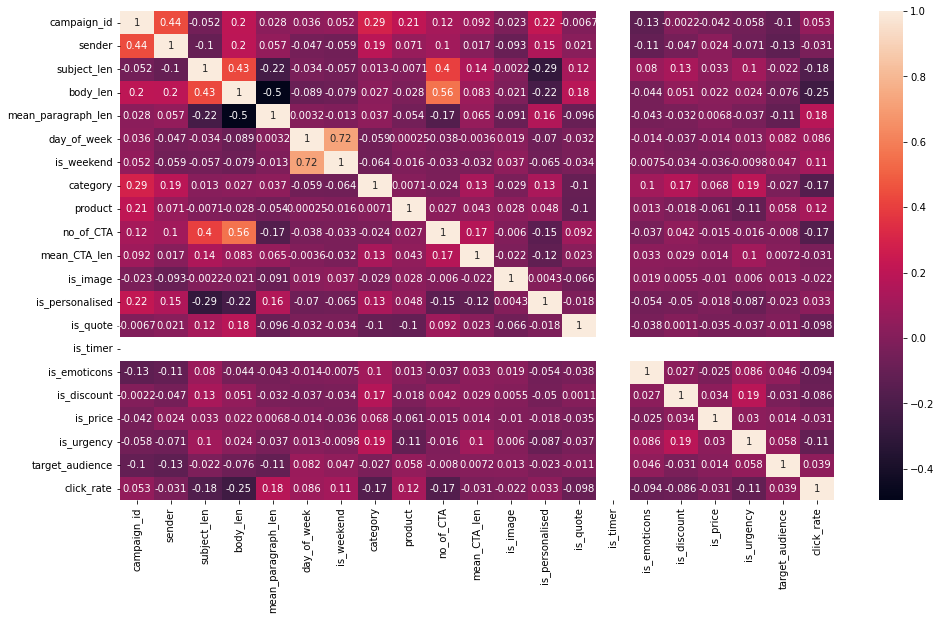

In [12]:
# lets plot correlation between features
plt.subplots(figsize=(16,9))
correlation_mat = ctr_train.corr()
sns.heatmap(correlation_mat, annot=True)

In [13]:
# lets find correlation of features with target feature
ctr_train.corrwith(ctr_train['click_rate']).sort_values(ascending= False)

click_rate            1.000000
mean_paragraph_len    0.178042
product               0.121602
is_weekend            0.114138
day_of_week           0.086372
campaign_id           0.053315
target_audience       0.038713
is_personalised       0.032922
is_image             -0.021527
is_price             -0.030540
mean_CTA_len         -0.031162
sender               -0.031398
is_discount          -0.086105
is_emoticons         -0.094305
is_quote             -0.098402
is_urgency           -0.114284
category             -0.167756
no_of_CTA            -0.172637
subject_len          -0.180143
body_len             -0.247866
is_timer                   NaN
dtype: float64

- There is very weak correlation of single feature’s as it’s maximum value is only 0.141528.
- Also we can see no relation for feature is_timer, lets find out why. 


### Exploratory Data Analysis-:

In [14]:
# feature campaign_id
ctr_train['campaign_id'].unique()

array([   1,    2,    3, ..., 1886, 1887, 1888], dtype=int64)


- Unique identifier for campaign. 
- Logically it has no contribuition to target feature. 
- It has unique id for reach datapoint.

<AxesSubplot:xlabel='count', ylabel='sender'>

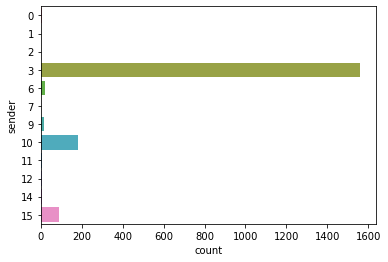

In [15]:
# finding count for each category
sns.countplot(y="sender", data=ctr_train)


- Sender of an e-mail. It has 12 unique values.
- category 3 is having maximum value while other categories having very less value.

<AxesSubplot:xlabel='subject_len'>

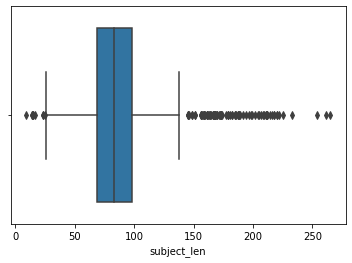

In [16]:
# boxplot and find distribution for subject_len
sns.boxplot(x=ctr_train['subject_len'])

- Number of character in subject  lies between 25 words to 140 words approximately.
- While some of email campaigns have Number of character in subject aboove 150 and upto 250.

<AxesSubplot:xlabel='body_len'>

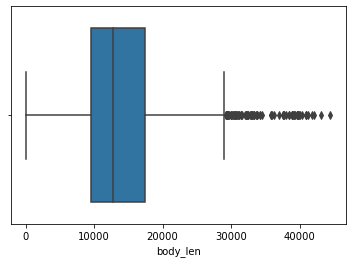

In [17]:
# boxplot and find distribution for body_len
sns.boxplot(x=ctr_train['body_len'])

- Number of character in body  lies between up to 30000 words approximately.
- While some of email campaigns have Number of character in body above 30000 also.

<AxesSubplot:xlabel='mean_paragraph_len'>

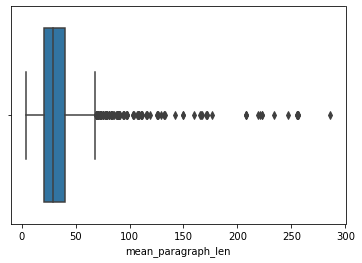

In [18]:
# boxplot and find distribution for mean_paragraph_len
sns.boxplot(x=ctr_train['mean_paragraph_len'])

- Number of character in body  lies between up to 70 approximately.
- While some of email campaigns have Number of character in body are above 70 and upto 300.

<AxesSubplot:xlabel='count', ylabel='day_of_week'>

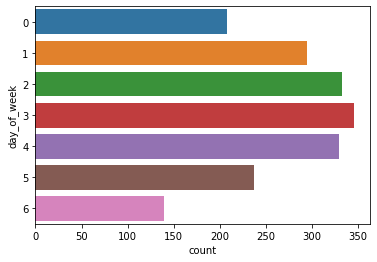

In [19]:
# finding count for each category day_of_week
sns.countplot(y="day_of_week", data=ctr_train)

- It is categorocal feature on which day email is sent.
- Count of email sent increasing from day 0 to day 3 gradually.
- While it is then decreasing from day 3 to day 6.

<AxesSubplot:xlabel='count', ylabel='times_of_day'>

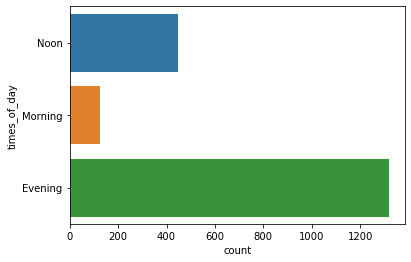

In [20]:
# finding count for each category times_of_day
sns.countplot(y="times_of_day", data=ctr_train)

- It is categorocal feature on which time email is sent.
- Most of the email sent in evening time followed by noon.

In [21]:
# feature category
len(ctr_train['category'].unique())

16

- Its categorical feature containing 16 unique values.

In [22]:
# feature product
len(ctr_train['product'].unique())


43

- Its categorical feature containing 43 unique values.

<AxesSubplot:xlabel='no_of_CTA'>

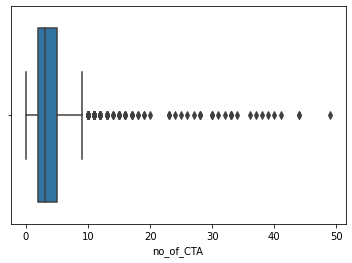

In [23]:
# boxplot and find distribution no_of_CTA
sns.boxplot(x=ctr_train['no_of_CTA'])

<AxesSubplot:xlabel='mean_CTA_len'>

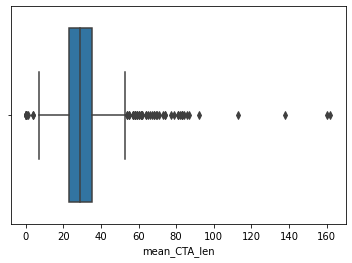

In [24]:
# boxplot and find distribution mean_CTA_len
sns.boxplot(x=ctr_train['mean_CTA_len'])

<AxesSubplot:xlabel='is_image', ylabel='count'>

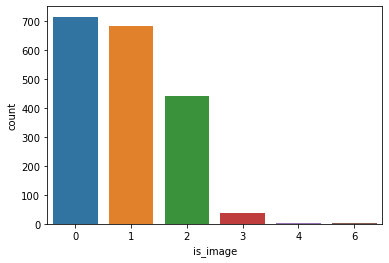

In [25]:
# boxplot and find distribution is_image
sns.countplot(x=ctr_train['is_image'])

- Most of emails having zero images.
- But emails having images are also significant value , hence it can be useful feature.

<AxesSubplot:xlabel='is_personalised', ylabel='count'>

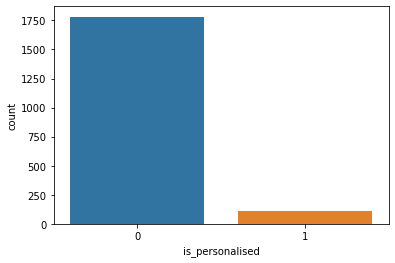

In [26]:
# boxplot and find distribution is_personalised
sns.countplot(x=ctr_train['is_personalised'])

- Most of emails having zero is_personalised.
- But emails having is_personalised are also significant value , hence it can be useful feature.

<AxesSubplot:xlabel='is_quote', ylabel='count'>

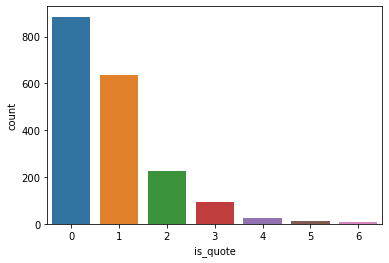

In [27]:
# boxplot and find distribution is_quote
sns.countplot(x=ctr_train['is_quote'])

- Most of emails having zero quote.
- But emails having quote are also significant value , hence it can be useful feature.

<AxesSubplot:xlabel='is_emoticons', ylabel='count'>

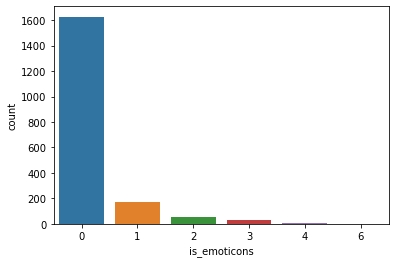

In [28]:
# boxplot and find distribution is_emoticons
sns.countplot(x=ctr_train['is_emoticons'])

- Here we can see most of almost 1600 emails have 0 emoticons.
- So we can drop this feature as it is not providing more information.

<AxesSubplot:xlabel='is_discount', ylabel='count'>

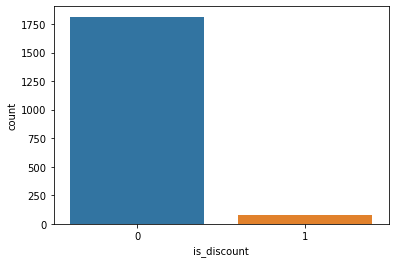

In [29]:
# boxplot and find distribution is_discount
sns.countplot(x=ctr_train['is_discount'])

- Here we can see most of almost 1750 emails have 0 discount flag.
- So we can drop this feature as it is not providing more information.

<AxesSubplot:xlabel='is_urgency', ylabel='count'>

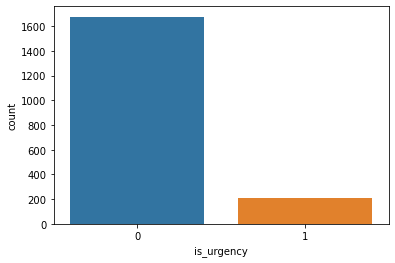

In [30]:
# boxplot and find distribution is_urgency
sns.countplot(x=ctr_train['is_urgency'])

- Here we can see most of almost 1600 emails have 0 is_urgency flag.
- So we can drop this feature as it is not providing more information.

In [31]:
# exploring is price feature is_price
ctr_train['is_price'].unique()

array([    0,  5499,  8000,  4999,  1399,  5000,  1000, 14999],
      dtype=int64)

Here we can see is price is categorical varible with boolean flag but it is showing values in some cases. Need to correct prices into boolean flag 1.

In [32]:
# replacing values 
ctr_train['is_price'] = np.where(ctr_train['is_price'] == 0, 0, 1)

In [33]:
ctr_train['is_price'].unique()

array([0, 1])

<AxesSubplot:xlabel='is_price', ylabel='count'>

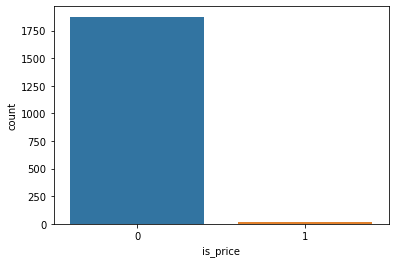

In [34]:
# finding counts of is price
sns.countplot(x=ctr_train['is_price'])

- Here we can see most of almost 1750 emails have 0 is_price flag.
- So we can drop this feature as it is not providing more information.

In [35]:
# exploring feature is_timer 
ctr_train['is_timer'].value_counts()

0    1888
Name: is_timer, dtype: int64

- Here we can see there is only one category.
- Hence we can drop this feature.

### Data Pre-processing-:

- From above data analysis we came to know that some features are dominating in train dataset.
- Also if we can check statistically those features having very correlation with target features.
- Those features can ve dropeed from train and test data set.

In [36]:
# drop feature from train dataset.

ctr_train.drop(['is_personalised','is_timer','is_emoticons','is_discount','is_price','is_urgency','sender'], axis =1, inplace = True)



In [37]:
# drop feature from test dataset.
ctr_test.drop(['is_personalised','is_timer','is_emoticons','is_discount','is_price','is_urgency','sender'], axis =1, inplace = True)

In [38]:
print(ctr_train.shape)
print(ctr_test.shape)

(1888, 15)
(762, 14)


Final number of features are 15 while 7 features dropped from train and test dataset

In [39]:
ctr_train.head(2)

,campaign_id,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_quote,target_audience,click_rate
0,1,76,10439,39,5,1,Noon,6,26,3,29,0,0,14,0.103079
1,2,54,2570,256,5,1,Morning,2,11,0,22,0,0,10,0.700000


In [40]:
# encoding product feature using target encoding

import category_encoders as ce
encoder=ce.TargetEncoder(cols='product') 
encoder.fit(ctr_train['product'],ctr_train['click_rate'])

ctr_train['product']= encoder.transform(ctr_train['product'])
ctr_test['product']= encoder.transform(ctr_test['product'])

ctr_train.shape

C:\Users\scorpions3394\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\scorpions3394\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


(1888, 15)

In [41]:
# encoding category feature using target encoding

import category_encoders as ce
encoder=ce.TargetEncoder(cols='category') 
encoder.fit(ctr_train['category'],ctr_train['click_rate'])

ctr_train['category']= encoder.transform(ctr_train['category'])
ctr_test['category']= encoder.transform(ctr_test['category'])

ctr_train.shape

(1888, 15)

In [42]:
# encoding target_audience feature using target encoding

import category_encoders as ce
encoder=ce.TargetEncoder(cols='target_audience') 
encoder.fit(ctr_train['target_audience'],ctr_train['click_rate'])

ctr_train['target_audience']= encoder.transform(ctr_train['target_audience'])
ctr_test['target_audience']= encoder.transform(ctr_test['target_audience'])

ctr_train.shape

(1888, 15)

In [43]:
# encoding times_of_day feature using one hot encoding


encoder_=ce.OneHotEncoder(cols='times_of_day')
ctr_train= encoder_.fit_transform(ctr_train)
ctr_test= encoder_.fit_transform(ctr_test)

ctr_train.shape

(1888, 17)

In [44]:
ctr_train.head(2)

,campaign_id,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day_1,times_of_day_2,times_of_day_3,category,product,no_of_CTA,mean_CTA_len,is_image,is_quote,target_audience,click_rate
0,1,76,10439,39,5,1,1,0,0,0.067375,0.060373,3,29,0,0,0.091743,0.103079
1,2,54,2570,256,5,1,0,1,0,0.079360,0.079360,0,22,0,0,0.040149,0.700000


## Model Training-:

In [45]:
# determining x and y values
X_train = ctr_train.loc[:, ctr_train.columns != 'click_rate']
y_target = ctr_train.click_rate.values

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_target, test_size=0.2, random_state=42)

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

hyper_param = {'max_depth':[5,10,15,20,25],'n_estimators': [25,50,75,100,125]}


model_RF = GridSearchCV(RandomForestRegressor(), hyper_param,scoring='r2', cv=3,n_jobs=-1)
model_RF.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [25, 50, 75, 100, 125]},
             scoring='r2')

In [61]:
from sklearn.metrics import r2_score

final_model = model_RF.best_estimator_
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_test)


print(r2_score(y_test, y_pred))

0.4568473448211722


In [62]:
ctr_test['click_rate'] = final_model.predict(ctr_test)

In [63]:
ctr_test.head(2)

,campaign_id,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day_1,times_of_day_2,times_of_day_3,category,product,no_of_CTA,mean_CTA_len,is_image,is_quote,target_audience,click_rate
0,1889,61,12871,11,6,1,1,0,0,0.067375,0.060373,3,37,1,0,0.091743,0.105023
1,1890,54,2569,256,5,1,0,1,0,0.079360,0.079360,0,22,0,0,0.040149,0.299893


In [65]:
submission = ctr_test[['campaign_id','click_rate']]

In [66]:
submission.head()

,campaign_id,click_rate
0,1889,0.105023
1,1890,0.299893
2,1891,0.164910
3,1892,0.164398
4,1893,0.121900


In [72]:
submission.to_csv('submission_final.csv', index=False)